In [21]:
import json
import pickle as cPickle
import numpy as np

from sklearn import svm
import sklearn.utils
from scipy.sparse import csr_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import random
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr


from collections import defaultdict
import math
from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import spearmanr
from sklearn import linear_model
import re
import copy

import seaborn as sns
import pandas as pd
import scipy.stats
import statsmodels.stats.proportion
from sklearn.cross_validation import LeaveOneOut
from prediction_utils.show_examples import update, generate_snapshots, clean
from prediction_utils.features2vec import _get_term_features, _get_last_n_action_features, \
            _get_action_features, _get_repeatition_features, _get_balance_features, documents2feature_vectors

In [43]:
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(int(100 * y))

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'


In [134]:
COLOR = ["#bb5f4c",
"#8e5db0",
"#729b57"]

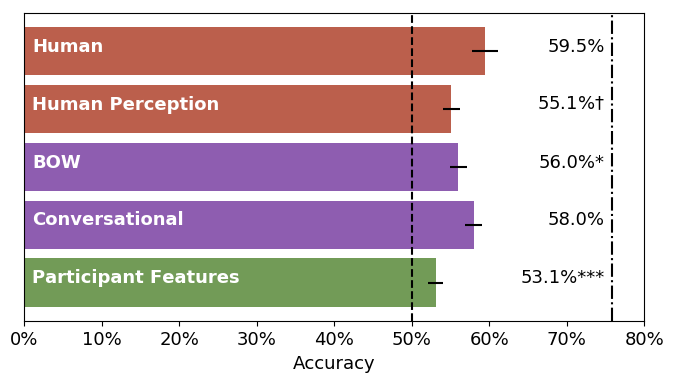

In [213]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 4))

# Example data
# conv+user C = 0.007
# BOW C= 0.00007
# Human 1 C = 0.0007
# FULL C = 0.0007
# User only C = 0.005
# conv only C = 0.005

methods = ('Human', 'Human Perception',  'BOW',   \
            'Conversational', \
             'Participant Features')
y_pos = np.arange(len(methods))
performance = ( 0.595, 0.551, 0.560, 0.580, 0.531)
lerr = [0.561, 0.525, 0.531, 0.559, 0.512]
uerr = [0.628, 0.594, 0.575, 0.603, 0.549]
err = [0.017,0.011, 0.011, 0.011, 0.01]
for ind, l in enumerate(lerr):
    lerr[ind] = performance[ind] - l
for ind, r in enumerate(uerr):
    uerr[ind] = r - performance[ind]
barwidth = 0.5
gap = 0.1
ax.barh(y_pos * (barwidth + gap), performance, barwidth, xerr=err, align='center',
        color=[COLOR[c] for c in [0, 0, 1, 1,  2]], ecolor='black')
ax.set_xlim(right=0.80)
upperbound = 0.759


fontsize=13
for i in range(len(methods)):
    text = '%.1f'%(performance[i]* 100) + '%'
    if methods[i] == 'Human Perception':
        text += '$\dag$'
    if methods[i] in ['BOW']:
        text += '*'
    if methods[i] == 'Participant Features':
        text += '***'
    ax.text( upperbound - 0.01, i * (barwidth+gap), text, fontsize=fontsize, horizontalalignment ='right')
    ax.text( 0.01, i * (barwidth+gap),methods[i], horizontalalignment ='left', fontsize=fontsize, fontweight='bold', color='white')
ax.set_yticks([])
#ax.set_yticklabels(methods)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy', fontsize=fontsize)
plt.axvline(x=0.5, color='k', linestyle='--')
plt.axvline(x=upperbound, color='k', linestyle='-.')
#plt.axhline(y=1.5, color='k', linestyle='-')
#plt.axhline(y=4.5, color='k', linestyle='-')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=fontsize)
plt.show()

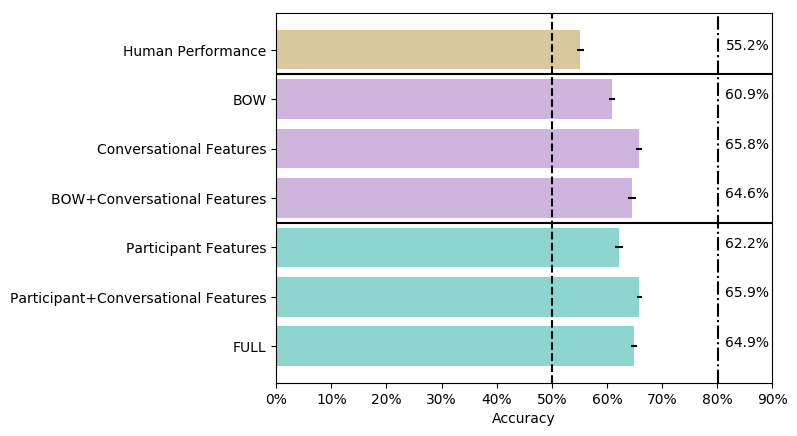

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
# conv+user C = 0.007
# BOW C= 0.0007
# Human 1 C = 0.0007
# FULL C = 0.0009
# User only C = 0.5
# conv only C = 0.007

methods = ('Human Performance', 'BOW',   \
            'Conversational Features', 'BOW+Conversational Features',  'Participant Features',\
           'Participant+Conversational Features', 'FULL')
y_pos = np.arange(len(methods))
performance = (0.552,0.609, 0.658, 0.646,  0.622, 0.659, 0.649)
error = (0.007, 0.005, 0.006, 0.007,  0.008, 0.004, 0.006)
ax.barh(y_pos, performance, xerr=error, align='center',
        color=[COLOR[c] for c in [0, 1, 1, 1, 2, 2, 2]], ecolor='black')
ax.set_xlim(right=0.90)

for i in range(len(methods)):
    ax.text( ax.get_xlim()[1] * 0.95, i,str(performance[i]* 100)[:4] + '%', horizontalalignment ='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(methods)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
plt.axvline(x=0.5, color='k', linestyle='--')
plt.axvline(x=0.8018, color='k', linestyle='-.')
plt.axhline(y=0.5, color='k', linestyle='-')
plt.axhline(y=3.5, color='k', linestyle='-')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()